In [244]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [245]:
#Objectives:1:Extract relevant data from file i.e title,gross and year
#           2:seperate relevant data from file
#           3:make relevant and clear visualisations of the data

In [246]:
#showing the data in the file as a dataframe
df=pd.read_csv('bom.movie_gross.csv.gz')
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [247]:
#creating a new column known as world gross(sum of domestic and foreign grosses)
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')
df['foreign_gross'] = df['foreign_gross'].fillna(0)
df['world_gross']=df['domestic_gross'] + df['foreign_gross']
df['world_gross']

,world_gross
0,1.067000e+09
1,1.025500e+09
2,9.603000e+08
3,8.283000e+08
4,7.526000e+08
...,...
3382,6.200000e+03
3383,4.800000e+03
3384,2.500000e+03
3385,2.400000e+03


In [248]:
#sorting out the top 10 highest grossing movies in terms of world gross
ratings=df[['title','studio','year','domestic_gross','foreign_gross','world_gross']]
ratings_sorted=ratings.sort_values(by='world_gross',ascending=False)
ratings_sorted.head(10)

,title,studio,year,domestic_gross,foreign_gross,world_gross
727,Marvel's The Avengers,BV,2012,623400000.0,895500000.0,1.518900e+09
1875,Avengers: Age of Ultron,BV,2015,459000000.0,946400000.0,1.405400e+09
3080,Black Panther,BV,2018,700100000.0,646900000.0,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,2011,381000000.0,960500000.0,1.341500e+09
2758,Star Wars: The Last Jedi,BV,2017,620200000.0,712400000.0,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,2018,417700000.0,891800000.0,1.309500e+09
1127,Frozen,BV,2013,400700000.0,875700000.0,1.276400e+09
2759,Beauty and the Beast (2017),BV,2017,504000000.0,759500000.0,1.263500e+09
3082,Incredibles 2,BV,2018,608600000.0,634200000.0,1.242800e+09
1128,Iron Man 3,BV,2013,409000000.0,805800000.0,1.214800e+09


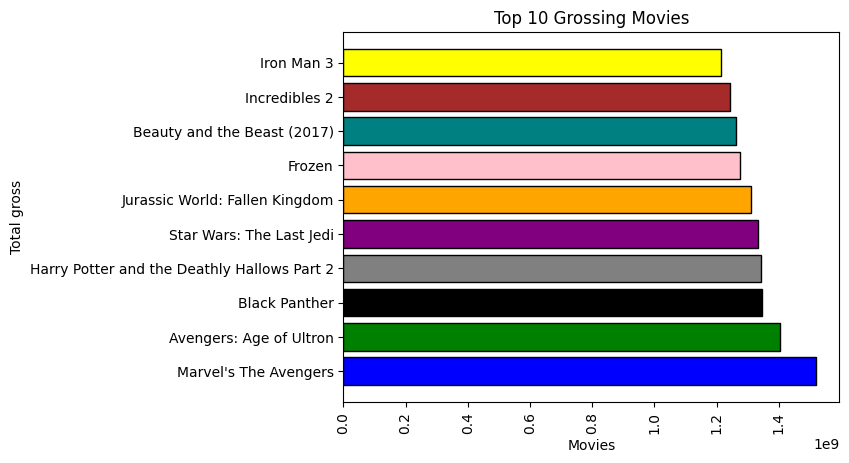

In [249]:
#plotting a bar graph for visual comparison of the top 10 grossing movies
colors = ['blue', 'green', 'black', 'grey', 'purple','orange','pink','teal','brown','yellow']
plt.barh(ratings_sorted['title'][:10],ratings_sorted['world_gross'][:10],color=colors,edgecolor='black')
plt.title('Top 10 Grossing Movies')
plt.xlabel('Movies')
plt.ylabel('Total gross')
plt.xticks(rotation=90)
plt.show()

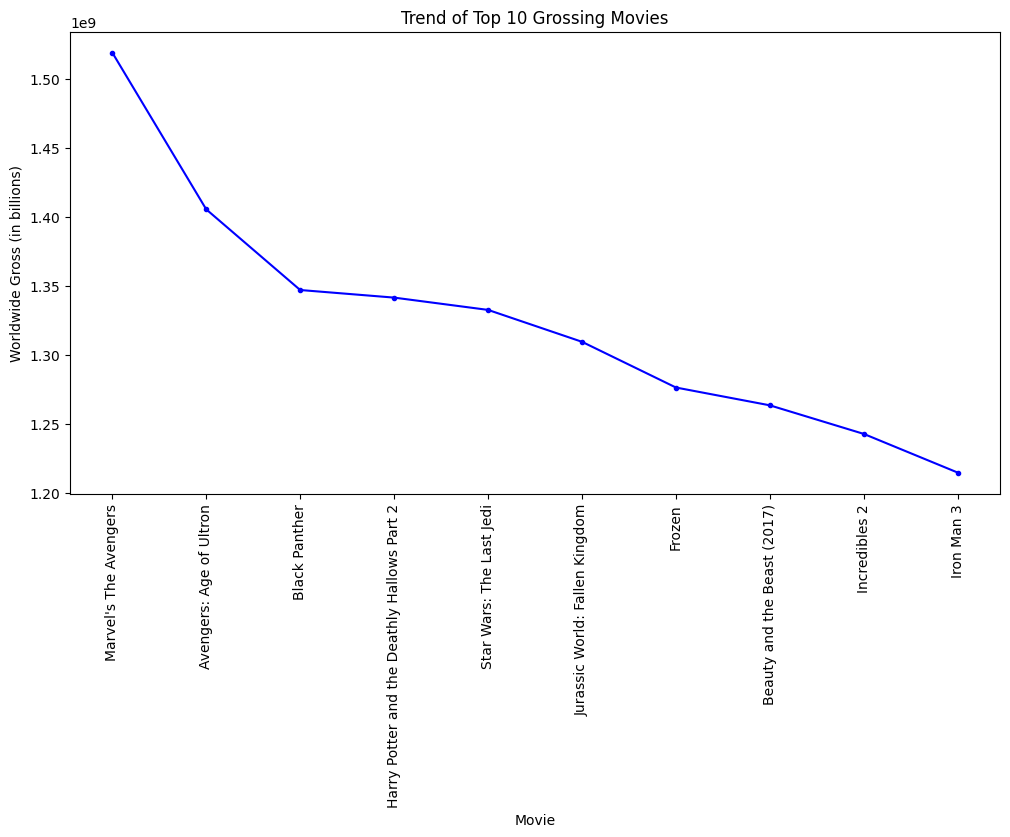

In [252]:
#Trend of the top 10 grossing movies
plt.figure(figsize=(12, 6))
plt.plot(ratings_sorted['title'][:10], ratings_sorted['world_gross'][:10], marker='.',color='blue')
plt.xticks(rotation=90)
plt.xlabel('Movie')
plt.ylabel('Worldwide Gross (in billions)')
plt.title('Trend of Top 10 Grossing Movies')
plt.show()

Text(0, 0.5, 'Total gross')

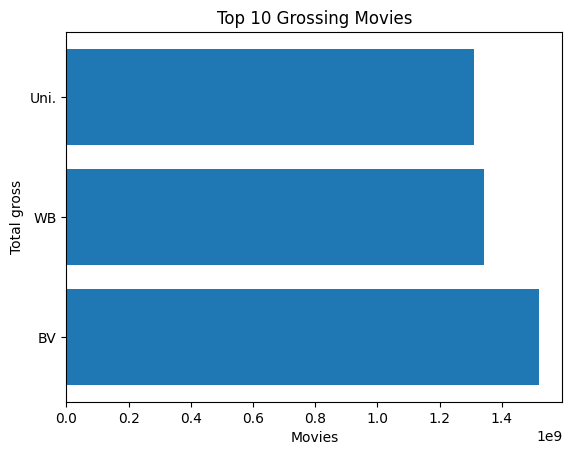

In [256]:
#Visual comparison of the top-grossing studios
plt.barh(ratings_sorted['studio'][:10],ratings_sorted['world_gross'][:10])
plt.title('Top 10 Grossing Movies')
plt.xlabel('Movies')
plt.ylabel('Total gross')

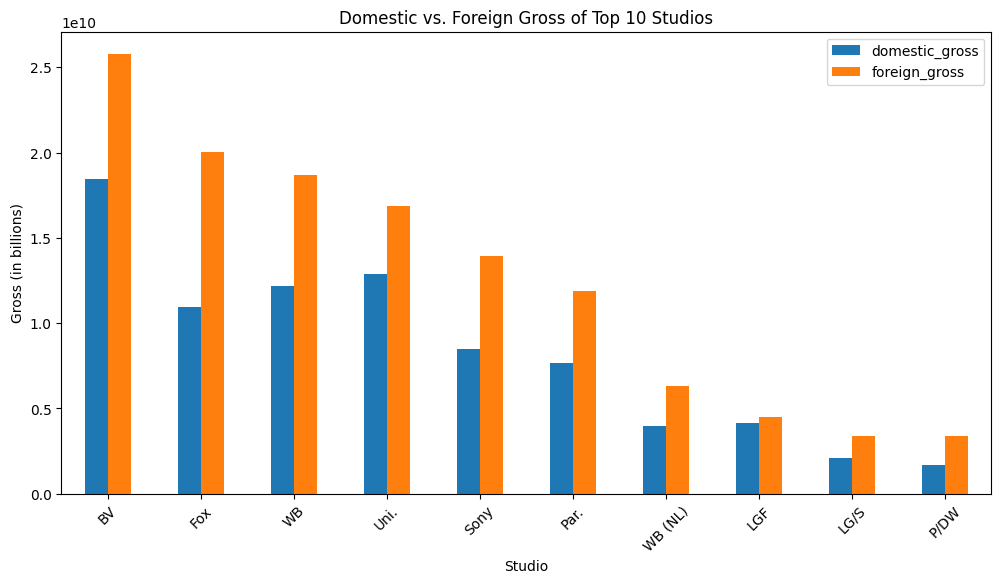

In [254]:
#comparison of the foreign and domestic grosses of the top 10 movies
studio_gross = df.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()
studio_gross['total_gross'] = studio_gross['domestic_gross'] + studio_gross['foreign_gross']
top_10_studios = studio_gross.sort_values('total_gross', ascending=False).head(10)

top_10_studios[['domestic_gross', 'foreign_gross']].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Studio')
plt.ylabel('Gross (in billions)')
plt.title('Domestic vs. Foreign Gross of Top 10 Studios')
plt.xticks(rotation=45)
plt.show()

# CONCLUSION:
From the findings above, it would be reasonable to conclude that:
1. With BV(Buena Vista) being the highest-grossing studio both in the domestic and foreign market and worldwide, it would be wise to consult with  BVstudios and try to emulate their previous work
2. Microsoft should look at the Marvel Studios' work on the Avengers franchise and look into what made it stand out from the top 10 grossing movies and what made it comparatively entertaining from the others.